# Project: Investigate a "No-Show Appointments" Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro' id="intro"></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

#### loading and Checking Data properties and finding points to clean 


### General Properties

In [2]:
# Load  data and print out a few lines.
df_noshow = pd.read_csv('noshow.csv')
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# find number of rows and Columns
df_noshow.shape

(110527, 14)

In [4]:
# getting information about data types and missing values
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# checknull Values
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#check for duplicated rows
df_noshow.duplicated().sum()

0

In [7]:
#get info about unique values
for col in df_noshow.columns:
   print(f'{col} : {df_noshow[col].unique()}')

PatientId : [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID : [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender : ['F' 'M']
ScheduledDay : ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay : ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:

In [8]:
#statistscs about the data
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

### According to previous Dataset wrangling the following steps should be done :
+ rename columns 
+ set 'AppointmentID' to be the index of the Dataset as it has a unique value for each row
+ change data type for 'ScheduledDay,AppointmentDay' to be Datetime and use only Date to calculate waiting days and create new
+column contain waiting days
+ Drop rows which contain age valu less the 1
+ Change the values of 'No_Show' column to be 0 and 1 ( 0 for Showup and 1 for No-Show) and change type to 'int'

In [9]:
# Set 'AppointmentID' as index
df_noshow.set_index('AppointmentID',inplace=True)
df_noshow.head(3)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [10]:
#Change No-Show values to be 0 for Showup and 1 for No-Show
df_noshow['No-show'] = df_noshow['No-show'].replace(['No','Yes'],['0','1']).astype('int')
df_noshow.head(3)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [11]:
#Drop Rows which contain age less than 1
Value = df_noshow.query('Age <1')
df_noshow.drop(Value.index,inplace=True)

In [12]:
df_noshow.rename(columns = {
  'PatientId':'Patient_ID',
  'ScheduledDay':'Scheduled_Day',
  'AppointmentDay':'Appointment_Day',
  'Neighbourhood':'Neighborhood' ,
  'Hipertension':'Hypertension',
  'Handcap':'Handicap',
   'No-show':'No_Show' 
  }, inplace = True)
df_noshow.head(3)

,Patient_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [13]:
df_noshow['Appointment_Day']=pd.to_datetime(df_noshow['Appointment_Day']).dt.date
df_noshow['Scheduled_Day']=pd.to_datetime(df_noshow['Scheduled_Day']).dt.date
df_noshow['Waiting_Days'] = (df_noshow['Appointment_Day'] - df_noshow['Scheduled_Day']).dt.days
df_noshow.head(3)

,Patient_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Waiting_Days
AppointmentID,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
5642503,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
5642549,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : What percentage of patients didn't show up for their appointments?

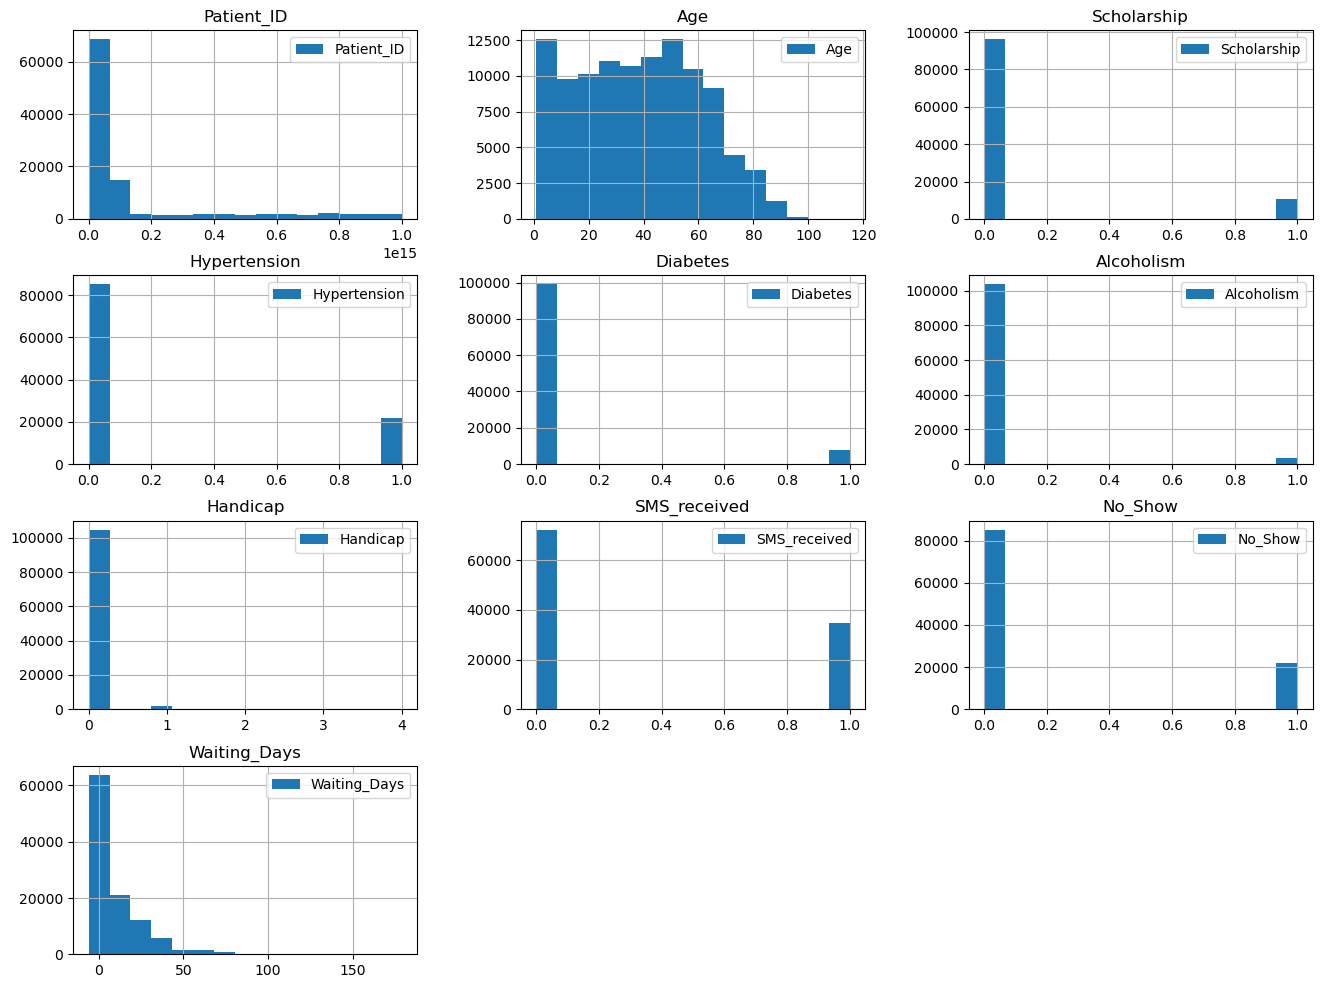

In [31]:
plotting = df_noshow.hist(legend=True,figsize=(16,12),bins =15);

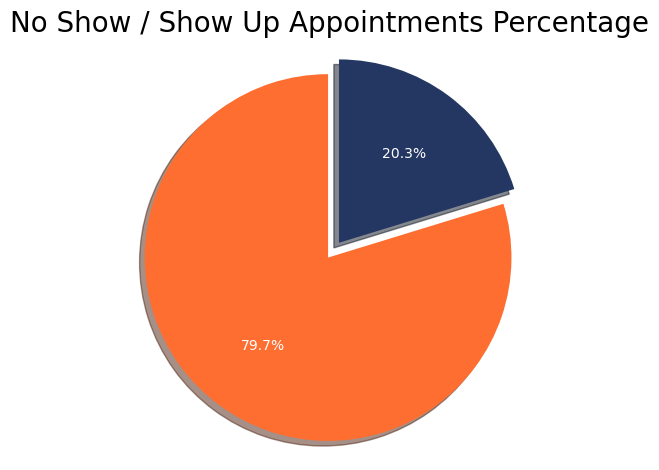

In [15]:
# Pie chart
labels = ["No Show", "Show Up"]
no_show_proportion = df_noshow["No_Show"].value_counts() / sum(df_noshow["No_Show"].value_counts())
explode = (0, 0.1)
colors = ['#FF6E31','#243763']
fig1, ax1 = plt.subplots()
ax1.pie(no_show_proportion, explode=explode, labels=labels,colors = colors, autopct='%1.1f%%',shadow=True, startangle=90,textprops={'color':"w"})
plt.title("No Show / Show Up Appointments Percentage",fontsize =20);
ax1.axis('equal')
plt.tight_layout()
plt.show()

###  This pie Graph Shows that 79.7% didn't Show up for Appointments and only 20.3% Showed up on Appointment

### Research Question 2 : What other factors affect show up on appointment?

In [16]:
noshow = df_noshow.query("No_Show == 1")
show = df_noshow.query("No_Show == 0")

In [17]:
# Function for repeated polluting code

def plot_fun(att,color,x,y):
    noshow[att].value_counts().plot(alpha=0.9, color = color, kind='bar');
    plt.gcf().set_size_inches(x,y)
    plt.xlabel(att, fontsize=16)
    plt.ylabel('No Show Counts', fontsize=16)
    plt.title(f'Effect of {att} on no-Show')
    plt.grid()

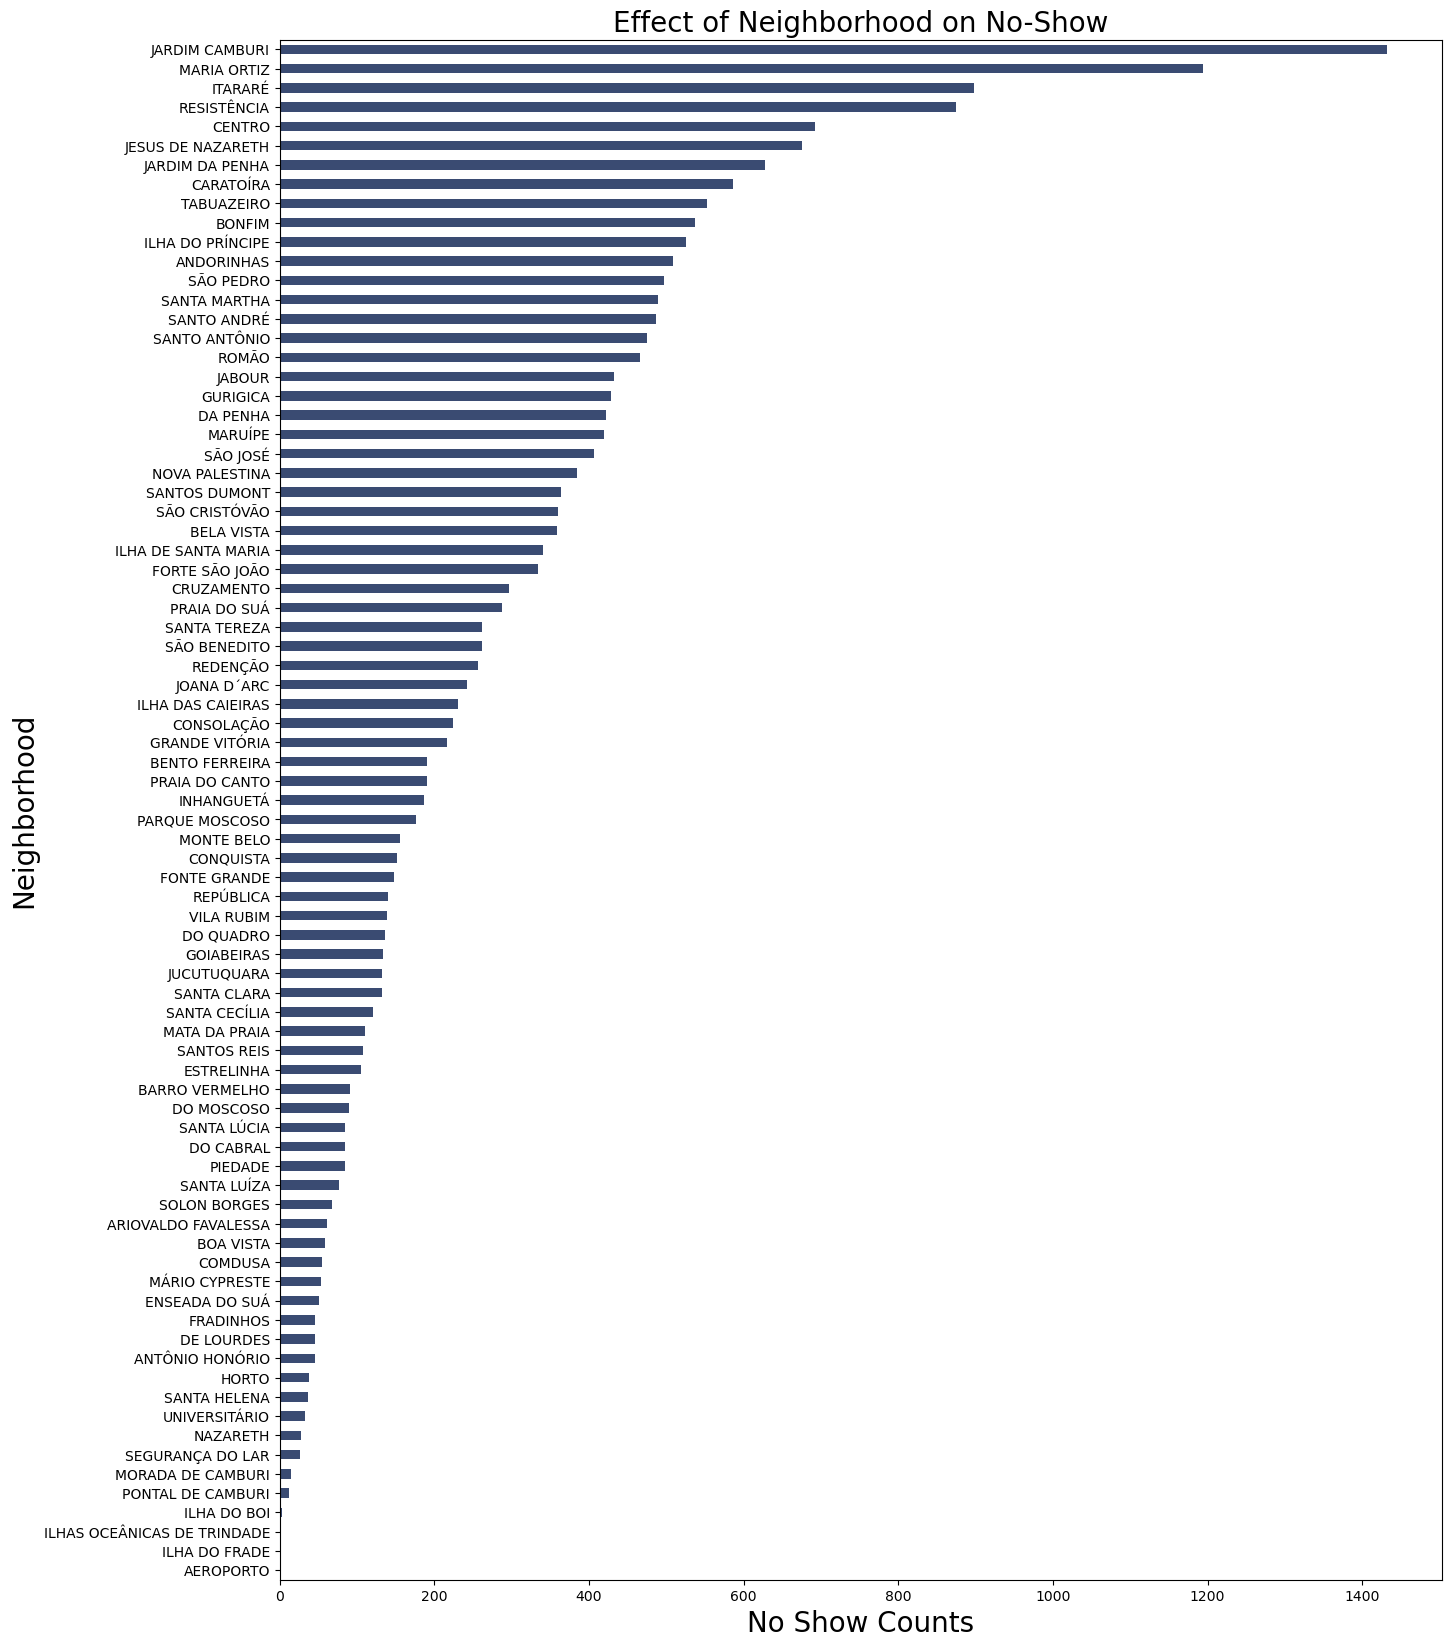

In [30]:
noshow['Neighborhood'].value_counts(ascending=True).plot(alpha=0.9, color = ['#243763'], kind='barh');
plt.gcf().set_size_inches(15,20)
plt.xlabel('No Show Counts', fontsize=20)
plt.ylabel('Neighborhood', fontsize=20)
plt.title(f'Effect of Neighborhood on No-Show',fontsize = 20);

### This Bar Chart shows that there are areas that have high counts of No-Show compared to other areas

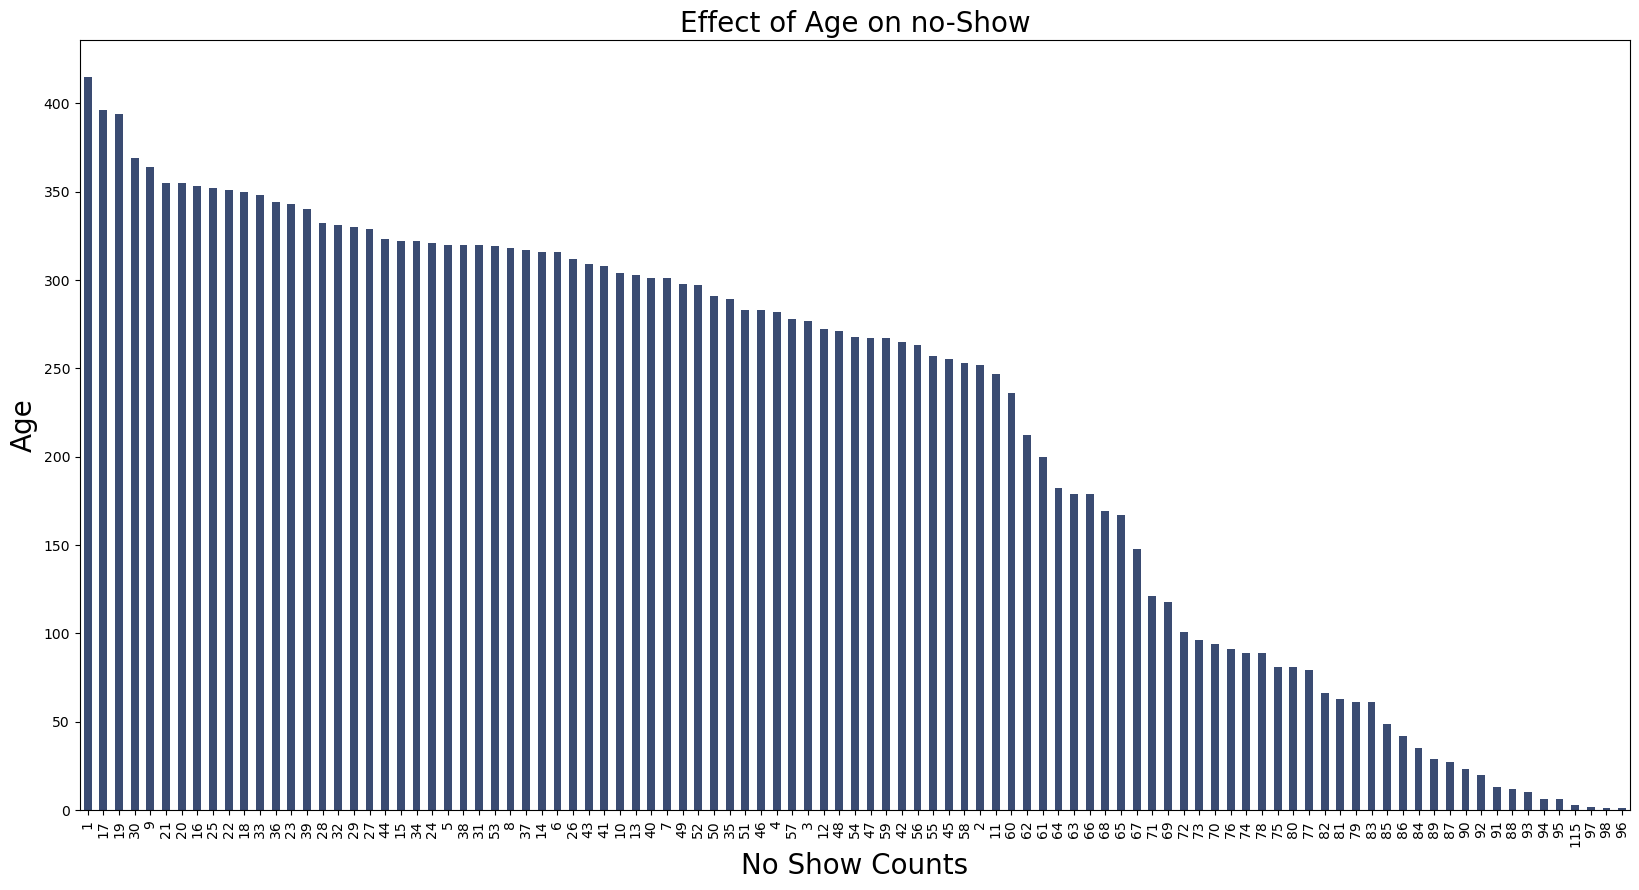

In [19]:
noshow['Age'].value_counts().plot(alpha=0.9, color = ['#243763'], kind='bar');
plt.gcf().set_size_inches(20,10)
plt.xlabel('No Show Counts', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.title(f'Effect of Age on no-Show',fontsize = 20);

### This bar chart shows a Negative correlation between age and No-Show counts which means that old are more careful to show up at their appointments 

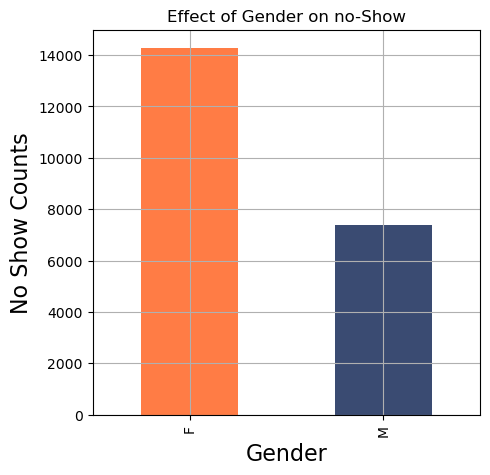

In [20]:
plot_fun('Gender',['#FF6E31','#243763'],5,5)

### This bar chart shows the female counts are higher than male in No-Show Data Set

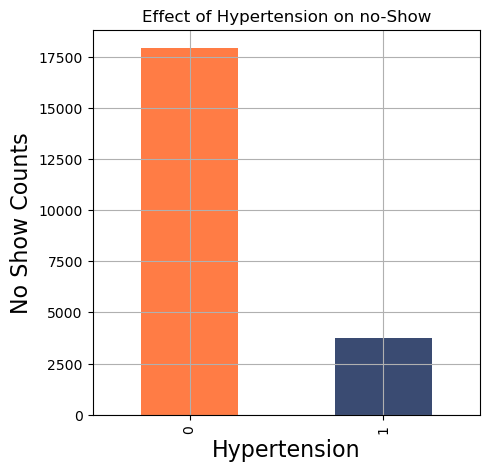

In [21]:
plot_fun('Hypertension',['#FF6E31','#243763'],5,5)

###  This bar chart shows that hypertension is not correlated to No-Show counts

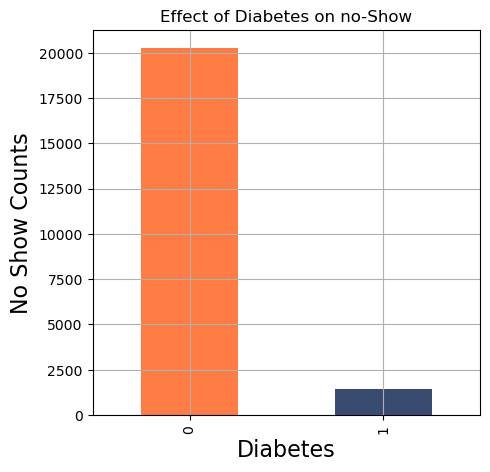

In [22]:
plot_fun('Diabetes',['#FF6E31','#243763'],5,5)

### This bar chart shows that Diabetes is not correlated to No-Show counts

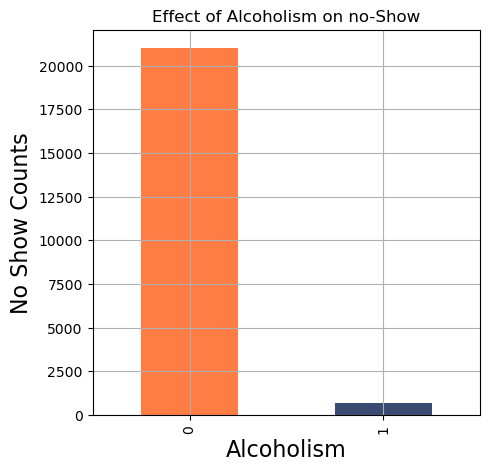

In [23]:
plot_fun('Alcoholism',['#FF6E31','#243763'],5,5)

### This bar chart shows that Alcoholism is not correlated to No-Show counts

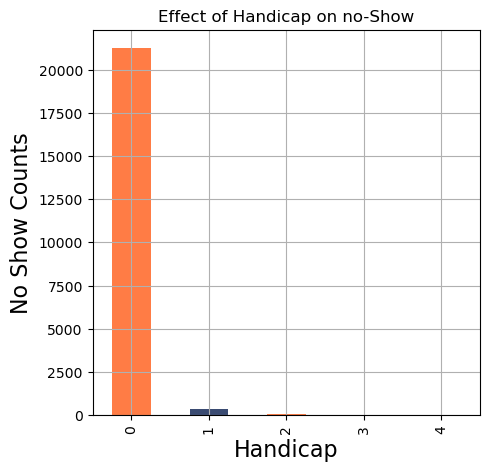

In [24]:
plot_fun('Handicap',['#FF6E31','#243763'],5,5)

### This bar chart shows that Handicap is not correlated to No-Show counts¶

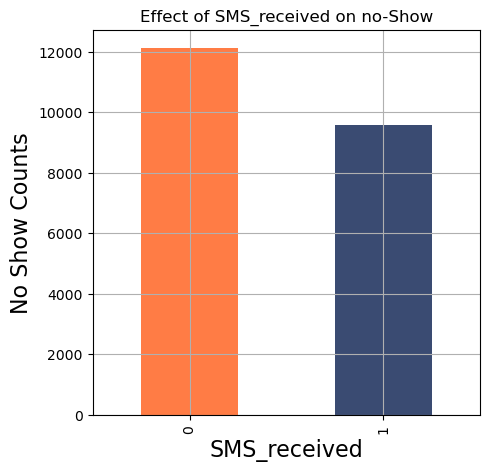

In [25]:
plot_fun('SMS_received',['#FF6E31','#243763'],5,5)

### This bar chart shows that SMS received is not correlated to No-Show counts

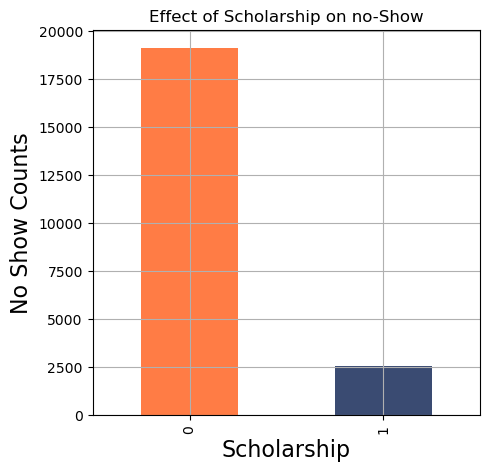

In [26]:
plot_fun('Scholarship',['#FF6E31','#243763'],5,5)

### This bar chart shows the patients who don't have scholarship are higher counts in the No-Show dataset

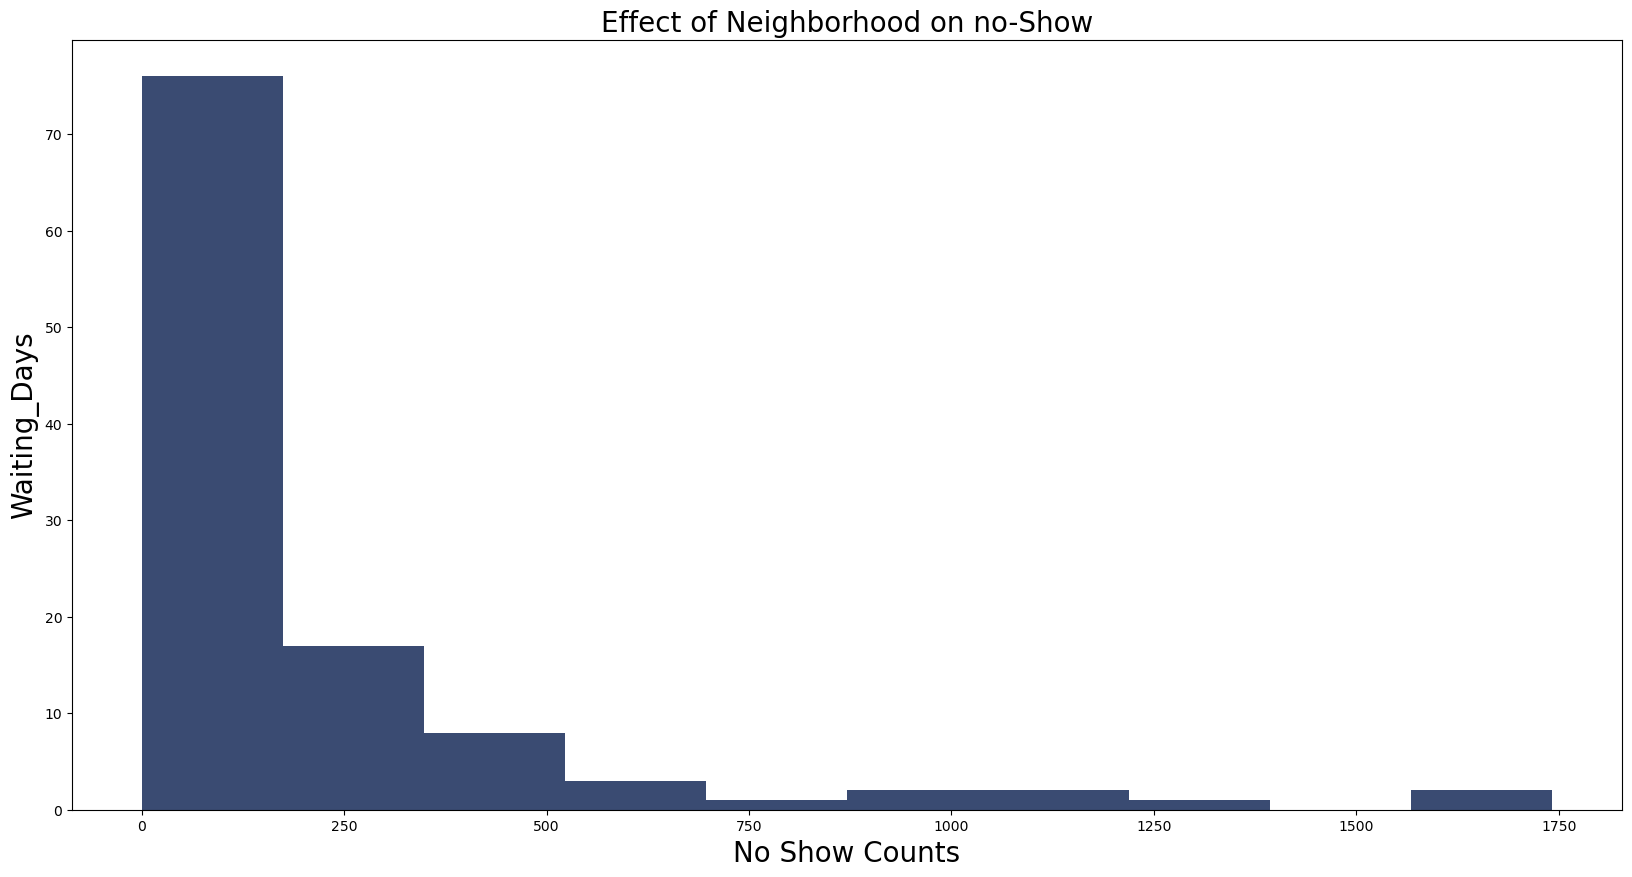

In [32]:
noshow['Waiting_Days'].value_counts(ascending=True).plot(alpha=0.9, color = ['#243763'], kind='hist');
plt.gcf().set_size_inches(20,10)
plt.xlabel('No Show Counts', fontsize=20)
plt.ylabel('Waiting_Days', fontsize=20)
plt.title(f'Effect of Neighborhood on no-Show',fontsize = 20);

### There is a Negative correlation between the number of waiting days and No-Show counts

<a id='conclusions'></a>
## Conclusions
- There is no correlation between 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', or 'SMS_received'  with a No-Show appointment 
- patients with Scholarship more likely attend their appointment
- There is a negative correlation between 'Age' and No-Show appointment count this means that  
- there is an obvious correlation between some Neighborhood and No-Show appointment count but there isn't enough information on -the dataset to show how far or near this Neighborhood is from the appointment location 
- there is a Negative correlation between the number of waiting days and the No-Show Count

## Limitation

* The data does not contain any information about the distance between the patient's place and the clinic
* The appointment time is missing and only the scheduled time is available